In [1]:
#%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import json
import seaborn
from scipy.stats import ttest_ind

yelp_df = pd.read_csv('Resources/yelp_data_clean.csv')
yelp_df.head()


,Unnamed: 0,Unnamed: 0.1,name,categories,address,city,postalCode,state,country,latitude,longitude,count,Rating,Review Count,Closed
0,0,0,Carl's Jr.,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",2555 11th Avenue,Greeley,80631,Colorado,US,40.39629,-104.69699,205,2.5,6.0,False
1,1,1,Del Taco,"Restaurant,Mexican Restaurants,Fast Food Resta...",2513 Highway 6 And 50,Grand Junction,81505,Colorado,US,39.08135,-108.58689,30,3.5,6.0,False
2,2,2,Chipotle Mexican Grill,"Fast Food Restaurants,Mexican Restaurants,Rest...",3455 N Salida Court,Aurora,80011,Colorado,US,39.76369,-104.77671,142,3.0,43.0,False
3,3,3,Taco Bell,"Fast Food Restaurants,Mexican Restaurants,Rest...",5225 E Colfax Avenue,Denver,80220,Colorado,US,39.74044,-104.92636,529,2.0,40.0,False
4,4,4,McDonald's,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",1350 W Colfax Avenue,Denver,80204,Colorado,US,39.73967,-105.00467,784,2.0,56.0,False


In [3]:
#Collecting top five restaurants by amount of restaurants in the sample
yelp_df['name'].value_counts()

Subway                    1089
McDonald's                 774
Taco Bell                  517
Burger King                438
Pizza Hut                  426
                          ... 
Little Caesars Pizza        11
Skyline Chili               11
Jason's Deli                10
Charley's Grilled Subs      10
Blimpie                      4
Name: name, Length: 73, dtype: int64

In [4]:
subway_df = yelp_df[yelp_df['name'] == 'Subway']
subway_df.head()

,Unnamed: 0,Unnamed: 0.1,name,categories,address,city,postalCode,state,country,latitude,longitude,count,Rating,Review Count,Closed
23,24,24,Subway,"Delis And Delicatessens,Restaurant,Carry-out f...",302 W Bypass,Andalusia,36420,Alabama,US,31.30987,-86.49962,1219,3.5,2.0,False
25,26,26,Subway,"Delis And Delicatessens,Restaurant,Carry-out f...",9433 Highway 431 S,Owens Cross Roads,35763,Alabama,US,34.57064,-86.44759,1219,5.0,1.0,False
29,31,31,Subway,"Delis And Delicatessens,Carry-out food,Delicat...",6707 Highway 431 S Ste 104,Owens Cross Roads,35763,Alabama,US,34.65901,-86.48167,1219,3.0,3.0,False
35,38,38,Subway,"Delis And Delicatessens,Carry-out food,Delicat...",720 Main St NE,Hanceville,35077,Alabama,US,34.07124,-86.77643,1219,5.0,1.0,False
59,62,62,Subway,"Delis And Delicatessens,Take Out Restaurants,F...",1003 Highway 231 S,Troy,36081,Alabama,US,31.78473,-85.96336,1219,3.5,3.0,False


In [5]:
mcdonalds_df = yelp_df[yelp_df['name'] == "McDonald's"]

In [6]:
tacobell_df = yelp_df[yelp_df['name'] == 'Taco Bell']

In [7]:
burgerking_df = yelp_df[yelp_df['name'] == 'Burger King']

In [8]:
pizzahut_df = yelp_df[yelp_df['name'] == 'Pizza Hut']

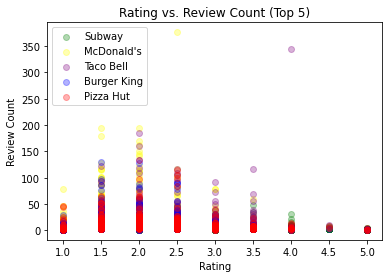

In [28]:
plt.scatter(subway_df['Rating'], subway_df['Review Count'], color='green', alpha = 0.3, label = "Subway")
plt.scatter(mcdonalds_df['Rating'], mcdonalds_df['Review Count'], color = 'yellow', alpha = 0.3, label = "McDonald's")
plt.scatter(tacobell_df['Rating'], tacobell_df['Review Count'], color = 'purple',alpha = 0.3, label = 'Taco Bell')
plt.scatter(burgerking_df['Rating'], burgerking_df['Review Count'], color = 'blue', alpha = 0.3, label = 'Burger King')
plt.scatter(pizzahut_df['Rating'], pizzahut_df['Review Count'], color = 'red', alpha = 0.3, label = 'Pizza Hut')
plt.legend()
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.title('Rating vs. Review Count (Top 5)')
plt.show()


In [20]:
tacobellmax = tacobell_df['Review Count'].max()

In [16]:
tacobell_point = yelp_df[yelp_df['Review Count'] == 344.0]
tacobell_point

,Unnamed: 0,Unnamed: 0.1,name,categories,address,city,postalCode,state,country,latitude,longitude,count,Rating,Review Count,Closed
4966,1210,1210,Taco Bell,"Mexican Restaurant,Restaurant,Fast Food Restau...",2575 N Clybourn Ave,Chicago,60614,Illinois,US,41.928577,-87.673296,529,4.0,344.0,False


In [17]:
mcdonaldsmax = mcdonalds_df['Review Count'].max()
mcdonaldsmax
mcdonalds_point = yelp_df[yelp_df['Review Count'] == 376.0]
mcdonalds_point

,Unnamed: 0,Unnamed: 0.1,name,categories,address,city,postalCode,state,country,latitude,longitude,count,Rating,Review Count,Closed
392,411,411,McDonald's,"Fast Food,Restaurants,Breakfast,Ice Cream Parl...",600 N Clark,Chicago,60610,Illinois,US,41.8929,-87.6316,784,2.5,376.0,False


In [22]:
yelp_df.sort_values(by = ['Review Count'], ascending = False).head(20)

,Unnamed: 0,Unnamed: 0.1,name,categories,address,city,postalCode,state,country,latitude,longitude,count,Rating,Review Count,Closed
4967,1211,1211,In-N-Out Burger,"Restaurant,Burger Joint,Fast Food Restaurant",9149 S Sepulveda Blvd,Los Angeles,90045,California,US,33.953658,-118.396897,15,4.0,1558.0,False
7,7,7,Captain D's Seafood Kitchen,"Fast Food Restaurants,American Restaurants,Fam...",605 S Havana Street,Aurora,80012,Colorado,US,39.705340,-104.866330,14,4.0,989.0,False
4116,324,324,Wingstop Restaurant,"Chicken Restaurants,Caterers,Fast Food Restaur...",227 Lake Merced Boulevard,Daly City,94015,California,US,37.700700,-122.484350,13,2.0,785.0,False
5094,1345,1345,Pollo Tropical,"Fast Food Restaurant,Latin American Restaurant",9055 John Hickman Parkway,Frisco,75035,Texas,US,33.112915,-96.804972,15,4.0,753.0,False
569,599,599,Captain D's Seafood Kitchen,"American Restaurants,Seafood Restaurants,Fast ...",649 Carlyle Avenue,Belleville,62221,Illinois,US,38.516650,-89.956070,14,4.0,723.0,False
6163,2474,2474,Captain D's Seafood Kitchen,"American Restaurants,Seafood Restaurants,Fast ...",4802 Augusta Road,Savannah,31408,Georgia,US,32.110160,-81.158210,14,4.0,697.0,False
476,498,498,Del Taco,"Mexican Restaurant,Restaurant,Carry-out food,F...",2871 Lenwood Rd,Barstow,92311,California,US,34.852000,-117.082400,30,4.5,622.0,False
1712,1796,1796,Chick-fil-A,"Take Out,Carry-out food,Caterers,Breakfast,Fri...",2280 Monterey Hwy,San Jose,95112,California,US,37.302900,-121.859900,100,3.0,615.0,False
1328,1394,1394,In-N-Out Burger,"Hamburgers & Hot Dogs,Restaurant,American Rest...",2950 E Capitol Expy,San Jose,95148,California,US,37.330100,-121.811300,15,4.0,544.0,False
5854,2145,2145,Chipotle Mexican Grill,"Mexican Restaurants,Fast Food Restaurants,Take...",2760 Mowry Avenue,Fremont,94538,California,US,37.554910,-121.983010,142,2.5,540.0,False


In [20]:
topfive_df = pd.concat([subway_df, mcdonalds_df, tacobell_df, burgerking_df, pizzahut_df], axis = 0)
topfive_df

,Unnamed: 0,Unnamed: 0.1,name,categories,address,city,postalCode,state,country,latitude,longitude,count,Rating,Review Count,Closed
23,24,24,Subway,"Delis And Delicatessens,Restaurant,Carry-out f...",302 W Bypass,Andalusia,36420,Alabama,US,31.309870,-86.499620,1219,3.5,2.0,False
25,26,26,Subway,"Delis And Delicatessens,Restaurant,Carry-out f...",9433 Highway 431 S,Owens Cross Roads,35763,Alabama,US,34.570640,-86.447590,1219,5.0,1.0,False
29,31,31,Subway,"Delis And Delicatessens,Carry-out food,Delicat...",6707 Highway 431 S Ste 104,Owens Cross Roads,35763,Alabama,US,34.659010,-86.481670,1219,3.0,3.0,False
35,38,38,Subway,"Delis And Delicatessens,Carry-out food,Delicat...",720 Main St NE,Hanceville,35077,Alabama,US,34.071240,-86.776430,1219,5.0,1.0,False
59,62,62,Subway,"Delis And Delicatessens,Take Out Restaurants,F...",1003 Highway 231 S,Troy,36081,Alabama,US,31.784730,-85.963360,1219,3.5,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7761,4159,4159,Pizza Hut,"Pizza,Carry-out food,Caterers,Restaurant deliv...",5245 Pleasant Ave,Fairfield,45014,Ohio,US,39.336830,-84.560620,474,1.5,2.0,False
7790,4190,4190,Pizza Hut,"Pizza,Italian Restaurant,Pizza Place and Itali...",1657 4th Ave,Charleston,25387,West Virginia,US,38.369460,-81.666280,474,1.0,3.0,False
7796,4196,4196,Pizza Hut,"Pizza,Restaurant,Italian,Fast Food,Take Out Re...",6048 Pacific Blvd,Huntington Park,90255,California,US,33.986122,-118.224864,474,2.0,17.0,False
7818,4222,4222,Pizza Hut,"Pizza,Restaurant,Carry-out food,Caterers,Resta...",6548 Gall Blvd,Zephyrhills,33542,Florida,US,28.253085,-82.187497,474,2.5,17.0,False


In [21]:
topfive_df.sort_values(by = ['Review Count'], ascending = False).head(60)
#relevant_df.head(40)

,Unnamed: 0,Unnamed: 0.1,name,categories,address,city,postalCode,state,country,latitude,longitude,count,Rating,Review Count,Closed
392,411,411,McDonald's,"Fast Food,Restaurants,Breakfast,Ice Cream Parl...",600 N Clark,Chicago,60610,Illinois,US,41.892900,-87.631600,784,2.5,376.0,False
4966,1210,1210,Taco Bell,"Mexican Restaurant,Restaurant,Fast Food Restau...",2575 N Clybourn Ave,Chicago,60614,Illinois,US,41.928577,-87.673296,529,4.0,344.0,False
5650,1931,1931,McDonald's,"Ice Cream Parlors,Restaurant,Breakfast,Fast Fo...",5019 Torrance Blvd,Torrance,90503,California,US,33.837900,-118.367400,784,2.0,195.0,False
1220,1285,1285,McDonald's,"Restaurant,Fast Food Restaurant,Fast Food,Rest...",1210 N Jefferson St,Anaheim,92807,California,US,33.862000,-117.837000,784,1.5,194.0,False
5448,1717,1717,Taco Bell,"Restaurant,Mexican,Breakfast,Vegetarian,Fast F...",535 W Capitol Expressway,San Jose,95136,California,US,37.274900,-121.852400,529,2.0,185.0,False
7436,3817,3817,McDonald's,"Carry-out food,Hot dog restaurants,American,Bu...",9852 Westminster Ave,Garden Grove,92844,California,US,33.759166,-117.957352,784,1.5,180.0,False
4127,335,335,McDonald's,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",1780 Main Street,Irvine,92614,California,US,33.685560,-117.856970,784,2.0,169.0,False
5368,1636,1636,McDonald's,"Ice Cream Parlors,Carry-out food,Breakfast,Hot...",3210 W Lincoln Ave,Anaheim,92801,California,US,33.831600,-118.002700,784,2.0,163.0,False
2773,2906,2906,Taco Bell,"Take Out,Mexican Restaurants,Mexican,Breakfast...",2779 Aborn Rd,San Jose,95121,California,US,37.314180,-121.792902,529,2.0,161.0,False
7616,4001,4001,McDonald's,"Restaurant,Carry-out food,Hot dog restaurants,...",650 Avenida Pico,San Clemente,92673,California,US,33.439519,-117.619417,784,2.0,151.0,False


Text(0.5, 1.0, 'Ratings vs. Review Count (All Restaurants)')

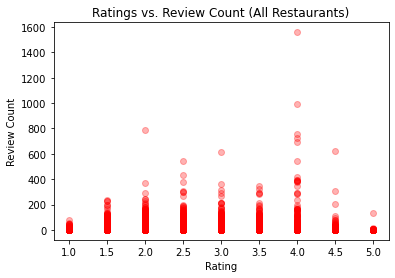

In [29]:
plt.scatter(yelp_df['Rating'], yelp_df['Review Count'], color = 'red', alpha = 0.3)
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.title('Ratings vs. Review Count (All Restaurants)')